In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../../labelled_data/part_D/imputed_partd.csv")

In [3]:
df

,Unnamed: 0,PRSCRBR_NPI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,...,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,Fraud,FraudType
0,0,1003000126,7632,0.0,86,1.0,324.0,369.800000,20606.08,8621.0,...,27.0,0.0,13.0,0.0,0.0,28.0,78.0,2.245800,0,0
1,1,1003000142,7632,0.0,9,1.0,1992.0,2145.666667,79803.65,60953.0,...,81.0,0.0,12.0,0.0,0.0,125.0,103.0,1.695165,0,0
2,2,1003000167,4394,0.0,42,1.0,57.0,57.700000,327.34,554.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.006070,0,0
3,3,1003000175,3535,1.0,42,1.0,18.0,18.000000,128.52,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.251869,0,0
4,4,1003000282,6421,1.0,120,1.0,37.0,47.000000,3834.98,1366.0,...,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.919074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254982,1254982,1992999569,13080,1.0,128,1.0,40.0,80.666667,9870.01,2357.0,...,0.0,16.0,0.0,0.0,0.0,0.0,11.0,1.451353,0,0
1254983,1254983,1992999650,4831,0.0,42,1.0,72.0,73.200000,397.84,1092.0,...,18.0,18.0,0.0,0.0,0.0,18.0,18.0,1.344691,0,0
1254984,1254984,1992999759,15356,0.0,120,1.0,47.0,90.466667,13618.96,2704.0,...,0.0,0.0,0.0,0.0,0.0,13.0,13.0,1.545349,1,2
1254985,1254985,1992999825,7632,0.0,137,1.0,249.0,291.066667,10899.52,5801.0,...,14.0,16.0,18.0,0.0,14.0,18.0,108.0,1.109445,0,0


In [4]:
df = df.drop(["Unnamed: 0","PRSCRBR_NPI"],axis=1)

In [5]:
df

,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Sprsn_Flag,...,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,Fraud,FraudType
0,7632,0.0,86,1.0,324.0,369.800000,20606.08,8621.0,106.0,1.0,...,27.0,0.0,13.0,0.0,0.0,28.0,78.0,2.245800,0,0
1,7632,0.0,9,1.0,1992.0,2145.666667,79803.65,60953.0,228.0,1.0,...,81.0,0.0,12.0,0.0,0.0,125.0,103.0,1.695165,0,0
2,4394,0.0,42,1.0,57.0,57.700000,327.34,554.0,43.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.006070,0,0
3,3535,1.0,42,1.0,18.0,18.000000,128.52,181.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.251869,0,0
4,6421,1.0,120,1.0,37.0,47.000000,3834.98,1366.0,17.0,1.0,...,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.919074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254982,13080,1.0,128,1.0,40.0,80.666667,9870.01,2357.0,17.0,1.0,...,0.0,16.0,0.0,0.0,0.0,0.0,11.0,1.451353,0,0
1254983,4831,0.0,42,1.0,72.0,73.200000,397.84,1092.0,27.0,1.0,...,18.0,18.0,0.0,0.0,0.0,18.0,18.0,1.344691,0,0
1254984,15356,0.0,120,1.0,47.0,90.466667,13618.96,2704.0,21.0,1.0,...,0.0,0.0,0.0,0.0,0.0,13.0,13.0,1.545349,1,2
1254985,7632,0.0,137,1.0,249.0,291.066667,10899.52,5801.0,126.0,1.0,...,14.0,16.0,18.0,0.0,14.0,18.0,108.0,1.109445,0,0


(1003989, 70)
(1003989, 1, 70)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 70)                39480     
                                                                 
 dense_2 (Dense)             (None, 128)               9088      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48697 (190.22 KB)
Trainable params: 48697 (190.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
6275/6275 [==============================] - 121s 19ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9998
Epoch 2/10
6275/6275 [==============================] - 119s 19ms/step - loss: 0.0022 - accuracy: 0.99

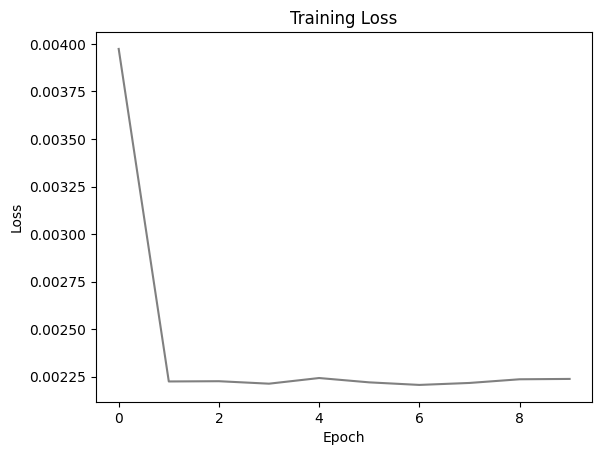

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud', 'FraudType'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [8]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


7844/7844 [==============================] - 37s 5ms/step
Accuracy: 0.9998


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    250939
           1       0.00      0.00      0.00        59

    accuracy                           1.00    250998
   macro avg       0.50      0.50      0.50    250998
weighted avg       1.00      1.00      1.00    250998

Confusion Matrix:
 [[250939      0]
 [    59      0]]


(1003989, 70)
(1003989, 1, 70)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 59)                30680     
                                                                 
 dense_2 (Dense)             (None, 128)               7680      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38489 (150.35 KB)
Trainable params: 38489 (150.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
6275/6275 [==============================] - 79s 12ms/step - loss: 0.0126 - accuracy: 0.9996 - val_loss: 0.0134 - val_accuracy: 0.9998
Epoch 2/10
6275/6275 [==============================] - 77s 12ms/step - loss: 0.0113 - accuracy: 0.9998

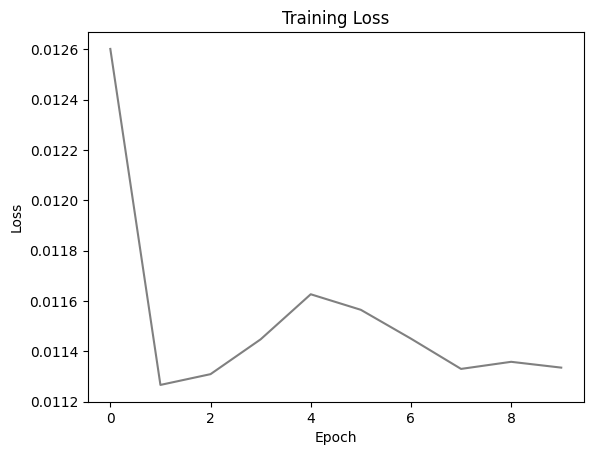

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud', 'FraudType'], axis=1)
y = df['FraudType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [9]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


7844/7844 [==============================] - 26s 3ms/step
Accuracy: 0.9998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    250939
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         2

    accuracy                           1.00    250998
   macro avg       0.11      0.11      0.11    250998
weighted avg       1.00      1.00      1.00    250998

Confusion Matrix:
 [[250939      0      0      0      0      0      0      0      0]
 [    18      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0  

/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [9]:
df = pd.read_csv("../../labelled_data/part_D/partd_rus_features.csv")

In [10]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","PRSCRBR_NPI"],axis=1)

In [11]:
df

,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Sprsn_Flag,...,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,Fraud
0,2929,1.0,120,1.0,1132.0,1191.566667,71404.48,25695.0,103.0,1.0,...,97.0,0.0,0.0,0.0,30.0,0.0,37.0,66.0,1.488790,0
1,4394,0.0,131,1.0,201.0,203.400000,2945.42,1641.0,77.0,1.0,...,69.0,20.0,0.0,0.0,0.0,0.0,13.0,80.0,1.040951,0
2,5885,0.0,86,1.0,7058.0,14652.966667,841439.84,428631.0,413.0,1.0,...,338.0,38.0,0.0,28.0,0.0,11.0,116.0,297.0,1.375367,0
3,9176,0.0,64,1.0,186.0,244.000000,4984.06,4018.0,105.0,1.0,...,80.0,17.0,0.0,0.0,0.0,0.0,32.0,73.0,1.393905,0
4,1060,1.0,120,1.0,54.0,96.000000,2551.76,2813.0,17.0,1.0,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.222294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,7632,0.0,63,1.0,263.0,423.600000,66723.17,12370.0,55.0,1.0,...,39.0,38.0,35.0,14.0,0.0,0.0,16.0,20.0,2.249708,1
580,5885,0.0,60,1.0,813.0,1618.800000,56694.66,45859.0,85.0,1.0,...,100.0,23.0,27.0,23.0,0.0,14.0,38.0,47.0,0.956362,1
581,7632,0.0,63,0.0,1040.0,2311.366667,100240.86,67529.0,122.0,1.0,...,44.0,30.0,0.0,105.0,0.0,0.0,101.0,21.0,1.233241,1
582,9176,0.0,86,1.0,2132.0,2296.933333,1444745.29,64849.0,90.0,1.0,...,59.0,11.0,15.0,15.0,0.0,14.0,49.0,41.0,1.292911,1


(467, 70)
(467, 1, 70)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 70)                39480     
                                                                 
 dense_4 (Dense)             (None, 128)               9088      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48697 (190.22 KB)
Trainable params: 48697 (190.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 3s 405ms/step - loss: 0.7125 - accuracy: 0.4772 - val_loss: 0.6859 - val_accuracy: 0.5957
Epoch 2/10
3/3 [==============================] - 0s 36ms/step - loss: 0.6896 - accuracy: 0.5067 - val_loss: 0.6816 -

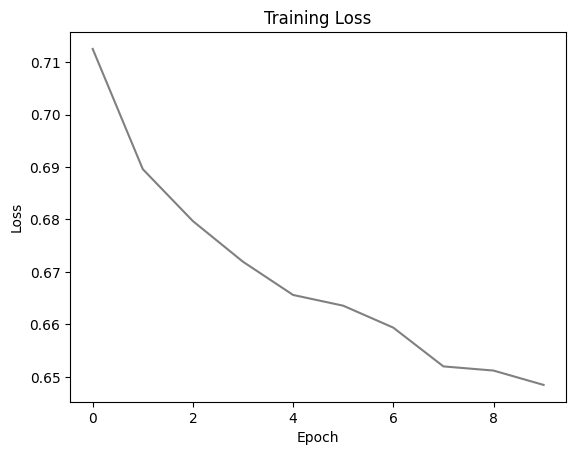

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [13]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


4/4 [==============================] - 0s 12ms/step
Accuracy: 0.5812
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.57        59
           1       0.57      0.60      0.59        58

    accuracy                           0.58       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.58      0.58      0.58       117

Confusion Matrix:
 [[33 26]
 [23 35]]


In [14]:
df = pd.read_csv("../../labelled_data/part_D/partd_ros_features.csv")

In [15]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","PRSCRBR_NPI"],axis=1)

In [16]:
df

,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Sprsn_Flag,...,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,Fraud
0,7632,0.0,86,1.0,324.0,369.800000,20606.08,8621.0,106.0,1.0,...,67.0,27.0,0.0,13.0,0.0,0.0,28.0,78.0,2.245800,0
1,7632,0.0,9,1.0,1992.0,2145.666667,79803.65,60953.0,228.0,1.0,...,130.0,81.0,0.0,12.0,0.0,0.0,125.0,103.0,1.695165,0
2,4394,0.0,42,1.0,57.0,57.700000,327.34,554.0,43.0,1.0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.006070,0
3,3535,1.0,42,1.0,18.0,18.000000,128.52,181.0,16.0,1.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.251869,0
4,6421,1.0,120,1.0,37.0,47.000000,3834.98,1366.0,17.0,1.0,...,12.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.919074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509385,9176,0.0,86,1.0,6364.0,11801.166667,478117.79,342993.0,312.0,1.0,...,236.0,41.0,0.0,22.0,0.0,13.0,60.0,252.0,1.169697,1
2509386,9176,0.0,60,1.0,5599.0,10111.033333,538281.10,296379.0,444.0,1.0,...,393.0,66.0,13.0,32.0,0.0,17.0,233.0,211.0,1.369505,1
2509387,9176,0.0,60,1.0,106.0,109.333333,3824.90,3195.0,33.0,1.0,...,33.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,2.111492,1
2509388,7632,0.0,86,1.0,959.0,1501.533333,107461.83,40631.0,134.0,1.0,...,53.0,18.0,14.0,42.0,0.0,19.0,80.0,54.0,1.624990,1


(2007512, 70)
(2007512, 1, 70)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 70)                39480     
                                                                 
 dense_6 (Dense)             (None, 128)               9088      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48697 (190.22 KB)
Trainable params: 48697 (190.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
12547/12547 [==============================] - 255s 20ms/step - loss: 0.6551 - accuracy: 0.6031 - val_loss: 0.6621 - val_accuracy: 0.6164
Epoch 2/10
12547/12547 [==============================] - 229s 18ms/step - loss: 0.6589 - accuracy: 

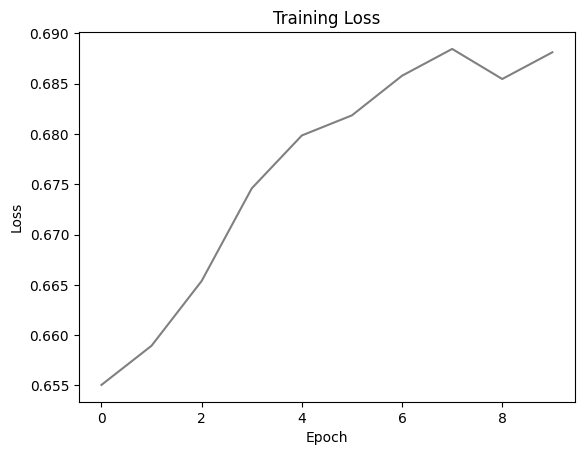

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [18]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


15684/15684 [==============================] - 39s 2ms/step
Accuracy: 0.5955
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.74      0.65    250761
           1       0.63      0.45      0.53    251117

    accuracy                           0.60    501878
   macro avg       0.60      0.60      0.59    501878
weighted avg       0.60      0.60      0.59    501878

Confusion Matrix:
 [[185128  65633]
 [137398 113719]]


In [19]:
df = pd.read_csv("../../labelled_data/part_D/partd_smote_features.csv")

In [20]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","PRSCRBR_NPI"],axis=1)

(1983412, 70)
(1983412, 1, 70)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 70)                39480     
                                                                 
 dense_8 (Dense)             (None, 128)               9088      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48697 (190.22 KB)
Trainable params: 48697 (190.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
12397/12397 [==============================] - 156s 12ms/step - loss: 0.5974 - accuracy: 0.6723 - val_loss: 0.5933 - val_accuracy: 0.6722
Epoch 2/10
12397/12397 [==============================] - 153s 12ms/step - loss: 0.5898 - accuracy: 

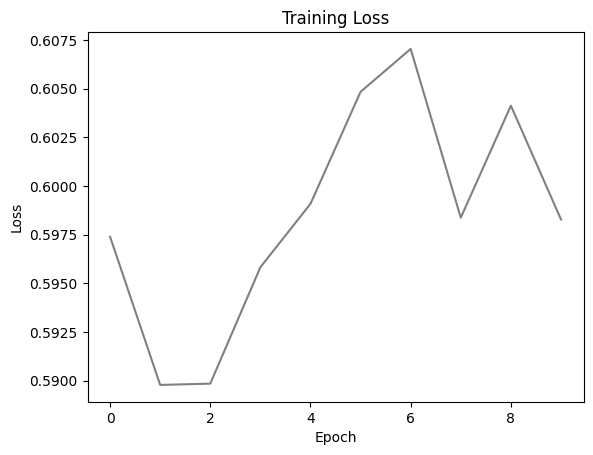

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['Fraud'], axis=1)
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [22]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


15496/15496 [==============================] - 42s 3ms/step
Accuracy: 0.7055
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68    245792
           1       0.68      0.78      0.73    250062

    accuracy                           0.71    495854
   macro avg       0.71      0.70      0.70    495854
weighted avg       0.71      0.71      0.70    495854

Confusion Matrix:
 [[153988  91804]
 [ 54211 195851]]


In [2]:
df = pd.read_csv("../../labelled_data/part_D/partd_rus_type_features.csv")

In [3]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","PRSCRBR_NPI"],axis=1)

(11, 70)
(11, 1, 70)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59)                30680     
                                                                 
 dense (Dense)               (None, 128)               7680      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38489 (150.35 KB)
Trainable params: 38489 (150.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 0.1250 - val_

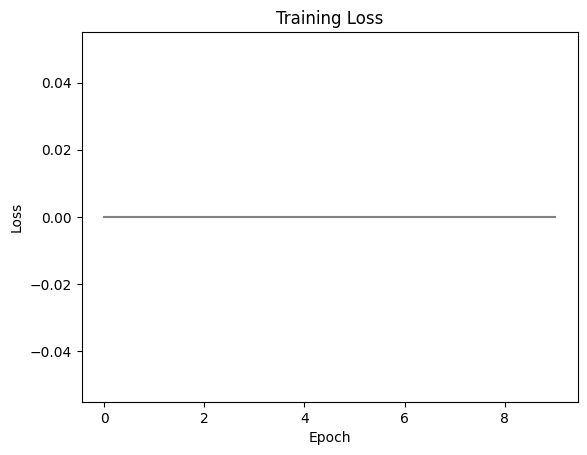

In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['FraudType'], axis=1)
y = df['FraudType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [5]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


1/1 [==============================] - 0s 254ms/step
Accuracy: 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

Confusion Matrix:
 [[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]


/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sujaykumar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [2]:
df = pd.read_csv("../../labelled_data/part_D/partd_ros_type_features.csv")

In [3]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","PRSCRBR_NPI"],axis=1)

In [4]:
df

,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Sprsn_Flag,...,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre,FraudType
0,7632,0.0,86,1.0,324.0,369.800000,20606.08,8621.0,106.0,1.0,...,67.0,27.0,0.0,13.0,0.0,0.0,28.0,78.0,2.245800,0
1,7632,0.0,9,1.0,1992.0,2145.666667,79803.65,60953.0,228.0,1.0,...,130.0,81.0,0.0,12.0,0.0,0.0,125.0,103.0,1.695165,0
2,4394,0.0,42,1.0,57.0,57.700000,327.34,554.0,43.0,1.0,...,41.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1.006070,0
3,3535,1.0,42,1.0,18.0,18.000000,128.52,181.0,16.0,1.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.251869,0
4,6421,1.0,120,1.0,37.0,47.000000,3834.98,1366.0,17.0,1.0,...,12.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0,4.919074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17565725,6109,1.0,158,1.0,167.0,206.000000,14205.65,4626.0,78.0,1.0,...,54.0,22.0,0.0,0.0,0.0,0.0,13.0,65.0,1.319562,13
17565726,6109,1.0,158,1.0,167.0,206.000000,14205.65,4626.0,78.0,1.0,...,54.0,22.0,0.0,0.0,0.0,0.0,13.0,65.0,1.319562,13
17565727,6109,1.0,158,1.0,167.0,206.000000,14205.65,4626.0,78.0,1.0,...,54.0,22.0,0.0,0.0,0.0,0.0,13.0,65.0,1.319562,13
17565728,6109,1.0,158,1.0,167.0,206.000000,14205.65,4626.0,78.0,1.0,...,54.0,22.0,0.0,0.0,0.0,0.0,13.0,65.0,1.319562,13


In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

X = df.drop(['FraudType'], axis=1)
y = df['FraudType']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


timesteps = 1  # You might need to adjust this based on the nature of your data
features = 70
output_dim = 1
print(X_train.shape)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], timesteps, features)
print(X_train_reshaped.shape)
model = Sequential()
model.add(LSTM(units=70, input_shape=(timesteps, features)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=output_dim, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_split=0.2)
plt.plot(history.history['loss'],color="gray")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


(14052584, 70)
(14052584, 1, 70)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59)                30680     
                                                                 
 dense (Dense)               (None, 128)               7680      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38489 (150.35 KB)
Trainable params: 38489 (150.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


: 

In [ ]:
X_test_reshaped = X_test.values.reshape(X_test.shape[0], timesteps, features)
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')

# Generate and print classification report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:\n', conf_matrix)


NameError: name 'X_test' is not defined